In [1]:
#importing modules
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import imp

C:\Users\DELL\AppData\Local\Temp\ipykernel_20180\85802848.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
#importing lumerical's python api
os.add_dll_directory("C:\\Program Files\\Lumerical\\v202\\api\\python")
lumapi = imp.load_source("lumapi", "C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py")
import lumapi

In [3]:
#initialising fdtd simulation
fdtd = lumapi.FDTD();

In [4]:
#setting up simulation parameters

x = 240e-9
y = 240e-9
z = 240e-9

r = 50e-9

wl_start = 200e-9
wl_stop = 1000e-9

time = 500e-15

In [5]:
# adding simulation area 
fdtd.addfdtd()

#setting the dimensions of simulation area
fdtd.set("x",0.0)
fdtd.set("x span", x)

fdtd.set("y",0.0)
fdtd.set("y span", y)

fdtd.set("z",0.0)
fdtd.set("z span", z)

#simulation dimension
fdtd.set("dimension","3D")
fdtd.set ("simulation time", time )

#configuring boundary conditions 
fdtd.set("mesh type", "uniform")

#setting yee cell size 
fdtd.set("dx",2.5e-9)
fdtd.set("dy",2.5e-9)
fdtd.set("dz",2.5e-9)

In [7]:
#adding the total field scatter field source 
fdtd.addtfsf()
fdtd.set("x",0.0)
fdtd.set("x span", x-40e-9) #decreasing the size of side by 40nm

fdtd.set("y",0.0)
fdtd.set("y span", y-40e-9)

fdtd.set("z",0.0)
fdtd.set("z span", z-40e-9)

#setting direction 
fdtd.set("injection axis","x")
fdtd.set("wavelength start", wl_start)
fdtd.set("wavelength stop", wl_stop)



In [10]:
#adding a movie monitor
fdtd.addmovie()

#setting dimensions for the monitor 
fdtd.set("x",0.0)
fdtd.set("x span", x)

fdtd.set("y",0.0)
fdtd.set("y span", y)

In [13]:
#adding a simulation object 
fdtd.addsphere()

#setting up dimensions 
fdtd.set("radius", r)
fdtd.set("x",0.0)
fdtd.set("y",0.0)

#adding material properties
fdtd.set("material","Au (Gold) - Johnson and Christy")

{!!}



C:\Program Files\Lumerical\v202\api\python\lumapi.py:138: UserWarning: Multiple objects named '::model::sphere'. Use of this object may give unexpected results.
  warnings.warn(message)


In [15]:
#adding detector
fdtd.addpower()

#calling the monitor by name
fdtd.set("name","DFT")
fdtd.set("monitor type","2D Z-normal")

fdtd.set("x span", x-40e-9) #decreasing the size of side by 40nm

fdtd.set("y",0.0)
fdtd.set("y span", y-40e-9)



fdtd.setglobalmonitor("frequency points",7)


1.0

In [17]:
#save lumerical file and run the simulation
fdtd.save("goldSphere.fsp")
fdtd.run()

In [30]:
# getting result data
E = fdtd.getresult("DFT","E")

In [20]:
print(E)
# printing out the whole dataset

{'lambda': array([[7.00000000e-07],
       [6.22222222e-07],
       [5.60000000e-07],
       [5.09090909e-07],
       [4.66666667e-07],
       [4.30769231e-07],
       [4.00000000e-07]]), 'f': array([[4.28274940e+14],
       [4.81809308e+14],
       [5.35343675e+14],
       [5.88878042e+14],
       [6.42412410e+14],
       [6.95946778e+14],
       [7.49481145e+14]]), 'x': array([[-1.00e-07],
       [-9.75e-08],
       [-9.50e-08],
       [-9.25e-08],
       [-9.00e-08],
       [-8.75e-08],
       [-8.50e-08],
       [-8.25e-08],
       [-8.00e-08],
       [-7.75e-08],
       [-7.50e-08],
       [-7.25e-08],
       [-7.00e-08],
       [-6.75e-08],
       [-6.50e-08],
       [-6.25e-08],
       [-6.00e-08],
       [-5.75e-08],
       [-5.50e-08],
       [-5.25e-08],
       [-5.00e-08],
       [-4.75e-08],
       [-4.50e-08],
       [-4.25e-08],
       [-4.00e-08],
       [-3.75e-08],
       [-3.50e-08],
       [-3.25e-08],
       [-3.00e-08],
       [-2.75e-08],
       [-2.50e-08],
     

In [22]:
#extracting the values of the datapoints
Lambda = E["lambda"]
Lambda = Lambda[:,0] #converting the 2d array to list of values 
print(Lambda)

[[7.00000000e-07]
 [6.22222222e-07]
 [5.60000000e-07]
 [5.09090909e-07]
 [4.66666667e-07]
 [4.30769231e-07]
 [4.00000000e-07]]


In [27]:
#extracting the data of the electric field in x and y direction
x = E["x"]
x = x[:,0]

y = E["y"]
y = y[:,0]

print("x = ", x)
print("y = ",y)

x =  [-1.00e-07 -9.75e-08 -9.50e-08 -9.25e-08 -9.00e-08 -8.75e-08 -8.50e-08
 -8.25e-08 -8.00e-08 -7.75e-08 -7.50e-08 -7.25e-08 -7.00e-08 -6.75e-08
 -6.50e-08 -6.25e-08 -6.00e-08 -5.75e-08 -5.50e-08 -5.25e-08 -5.00e-08
 -4.75e-08 -4.50e-08 -4.25e-08 -4.00e-08 -3.75e-08 -3.50e-08 -3.25e-08
 -3.00e-08 -2.75e-08 -2.50e-08 -2.25e-08 -2.00e-08 -1.75e-08 -1.50e-08
 -1.25e-08 -1.00e-08 -7.50e-09 -5.00e-09 -2.50e-09  0.00e+00  2.50e-09
  5.00e-09  7.50e-09  1.00e-08  1.25e-08  1.50e-08  1.75e-08  2.00e-08
  2.25e-08  2.50e-08  2.75e-08  3.00e-08  3.25e-08  3.50e-08  3.75e-08
  4.00e-08  4.25e-08  4.50e-08  4.75e-08  5.00e-08  5.25e-08  5.50e-08
  5.75e-08  6.00e-08  6.25e-08  6.50e-08  6.75e-08  7.00e-08  7.25e-08
  7.50e-08  7.75e-08  8.00e-08  8.25e-08  8.50e-08  8.75e-08  9.00e-08
  9.25e-08  9.50e-08  9.75e-08  1.00e-07]
y =  [-1.00e-07 -9.75e-08 -9.50e-08 -9.25e-08 -9.00e-08 -8.75e-08 -8.50e-08
 -8.25e-08 -8.00e-08 -7.75e-08 -7.50e-08 -7.25e-08 -7.00e-08 -6.75e-08
 -6.50e-08 -6.25e-08 -6.0

In [31]:
#getting only electric field values
E = E['E']

# E[x_axis_points, y_axis_points, z_axis_points, all_wavelengths, x_comonent_of electric_field]
Ex = E[:,:,0,:,0] 


# E[x_axis_points, y_axis_points, z_axis_points, all_wavelengths, y_comonent_of electric_field]
Ey = E[:,:,0,:,1] 


# E[x_axis_points, y_axis_points, z_axis_points, all_wavelengths, z_comonent_of electric_field]
Ez = E[:,:,0,:,2] 

print(Ex)
print(Ey)
print(Ez)



[[[ 0.06851085+0.10519847j  0.05491438+0.15422893j
   -0.04620564+0.22547201j ... -0.10742848+0.07280232j
   -0.12177626+0.0647513j  -0.14385446+0.03333664j]
  [ 0.0706589 +0.10792033j  0.05715947+0.15793656j
   -0.0456467 +0.23142045j ... -0.10902445+0.07574179j
   -0.12354575+0.06774776j -0.14617858+0.03612765j]
  [ 0.07286494+0.11069754j  0.05942854+0.16170872j
   -0.04510627+0.23740304j ... -0.11057919+0.07868152j
   -0.12525302+0.07074938j -0.14842024+0.03894328j]
  ...
  [-0.07286499-0.11069773j -0.05942852-0.1617089j
    0.04510626-0.23740315j ...  0.11057913-0.0786817j
    0.1252529 -0.07074952j  0.14842004-0.03894335j]
  [-0.07065891-0.10792046j -0.05715937-0.15793661j
    0.04564684-0.23142042j ...  0.10902443-0.07574166j
    0.12354576-0.06774773j  0.14617878-0.03612762j]
  [-0.06851095-0.10519848j -0.05491444-0.15422896j
    0.04620551-0.22547202j ...  0.10742849-0.07280244j
    0.12177635-0.06475132j  0.14385433-0.03333653j]]

 [[ 0.07105328+0.10841064j  0.05701308+0.15876

In [32]:
# the values of these electric fields are in form of complex numbers 
#therefore we will be changing them into normal real values
#np.abs(Ex) gives the absolute magnitude of the complex number.
#taking the root of the squares of magnitudes of each electric field component gives the value of the total electric field at a point in the space with x and y coordinates.
Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

print(Emag)

[[[0.15376918 0.20609565 0.29772981 ... 0.17537019 0.19178348 0.20950437]
  [0.15642072 0.20944865 0.30252877 ... 0.17827536 0.19502763 0.2130833 ]
  [0.15909258 0.21281192 0.30731501 ... 0.18116437 0.19825922 0.21665682]
  ...
  [0.15909255 0.21281195 0.30731498 ... 0.18116437 0.1982592  0.21665669]
  [0.15642072 0.20944864 0.30252875 ... 0.17827528 0.19502768 0.21308339]
  [0.15376921 0.20609579 0.29772988 ... 0.17537031 0.19178365 0.20950438]]

 [[0.51090614 0.47924452 0.40250537 ... 0.43082313 0.44838266 0.4991665 ]
  [0.99789198 0.95591022 0.85510039 ... 0.91561092 0.92864207 0.97541438]
  [0.99740228 0.95575284 0.85594701 ... 0.91547065 0.92811953 0.97494282]
  ...
  [0.99740238 0.955753   0.85594705 ... 0.91547077 0.92811963 0.97494298]
  [0.99789199 0.95591036 0.85510055 ... 0.91561099 0.92864217 0.97541464]
  [0.51090614 0.47924468 0.40250558 ... 0.43082317 0.44838269 0.49916643]]

 [[0.51784912 0.48820366 0.40925519 ... 0.42246683 0.43740684 0.48602355]
  [1.00423222 0.963499

In [34]:
#finding the index of particular wavelenght in the dataset
lambda_want = 500e-9
index = np.argmin(np.abs(Lambda-lambda_want))
print(index)

3


Text(0.5, 1.0, 'Electric field visualisation in the xy plane')

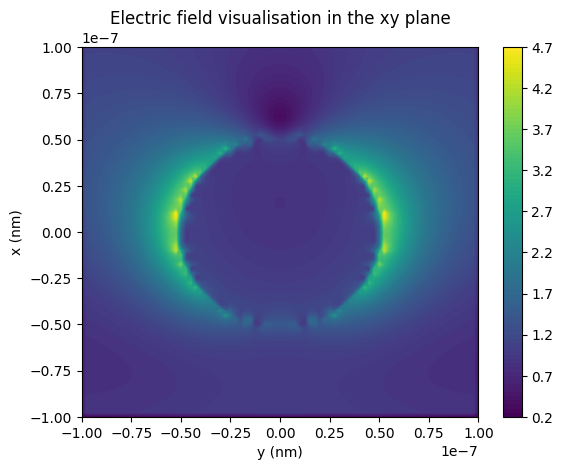

In [39]:
#plotting data for a single slice datapoint
plt.contourf(y,x,Emag[:,:,index],100)
plt.colorbar()
plt.xlabel('y (nm)')
plt.ylabel('x (nm)')
plt.title("Electric field visualisation in the xy plane")